Data Analyzed By: Lusi Yang @ Corning Inc. 

# Analyze the AAPL Stock

In [68]:
# Load up the required packages
library(MASS)
library(quantmod)

In [69]:
# Load up Apple's Stock AAPL
getSymbols("AAPL",src="yahoo")

[1] "AAPL"

In [3]:
# Read the column names
colnames(AAPL)

[1] "AAPL.Open"     "AAPL.High"     "AAPL.Low"      "AAPL.Close"   
[5] "AAPL.Volume"   "AAPL.Adjusted"

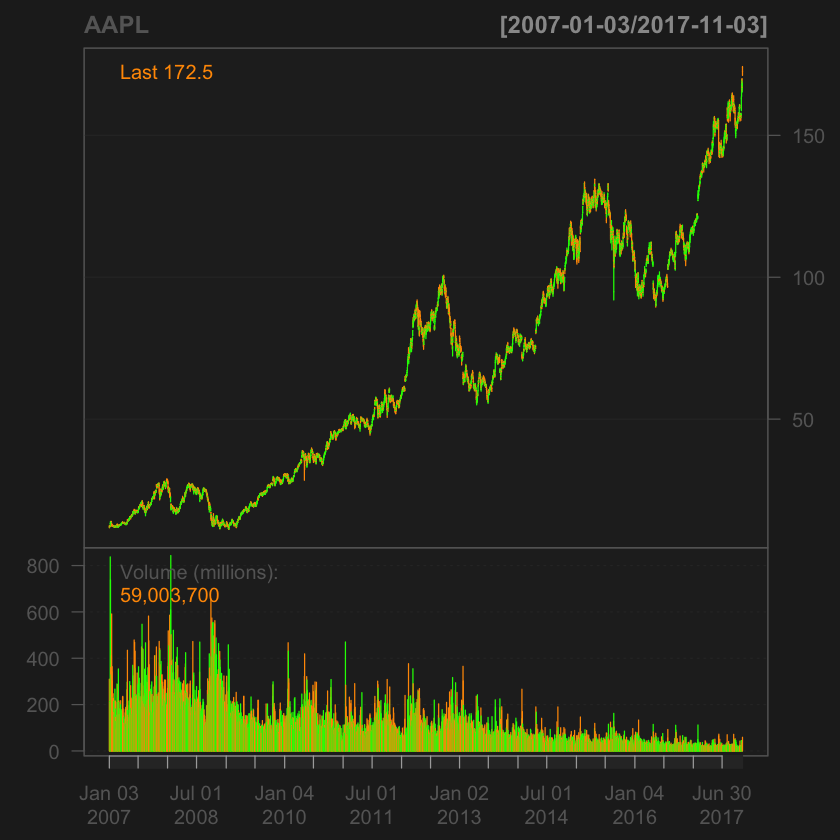

In [4]:
# Visualize the AAPL Stock
barChart(AAPL) 

Apple's stock is going up over time, but it is definetely not stationary. However, in recent time, Apple's stock volume in trade has been declining as iPhone 8 & 8 Plus was introduced to the public. This decline indicates that investors are losing faith in Apple; thus, Apple stock has become less active than before.

Reference: https://www.marketwatch.com/story/apple-stock-on-track-for-worst-week-ahead-of-an-iphone-launch-2017-09-21

Stationarity 

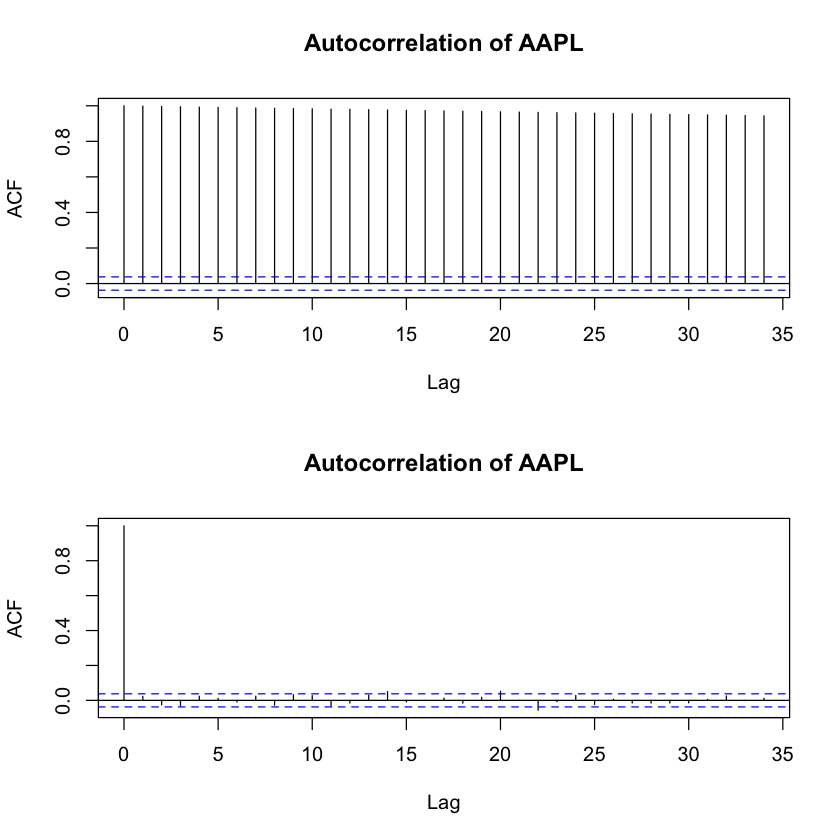

In [70]:
# The original series is not stationary, so it needs differencing
AdjClosed = AAPL[,6]
par(mfrow=c(2,1))
acf(as.ts(AdjClosed), main = "Autocorrelation of AAPL")
acf(diff(as.ts(AdjClosed)), main = "Autocorrelation of AAPL")

Non-stationary: ACF decreases slowly (graph above)
Stationary: ACF drops to zero relatively quickly (graph below)

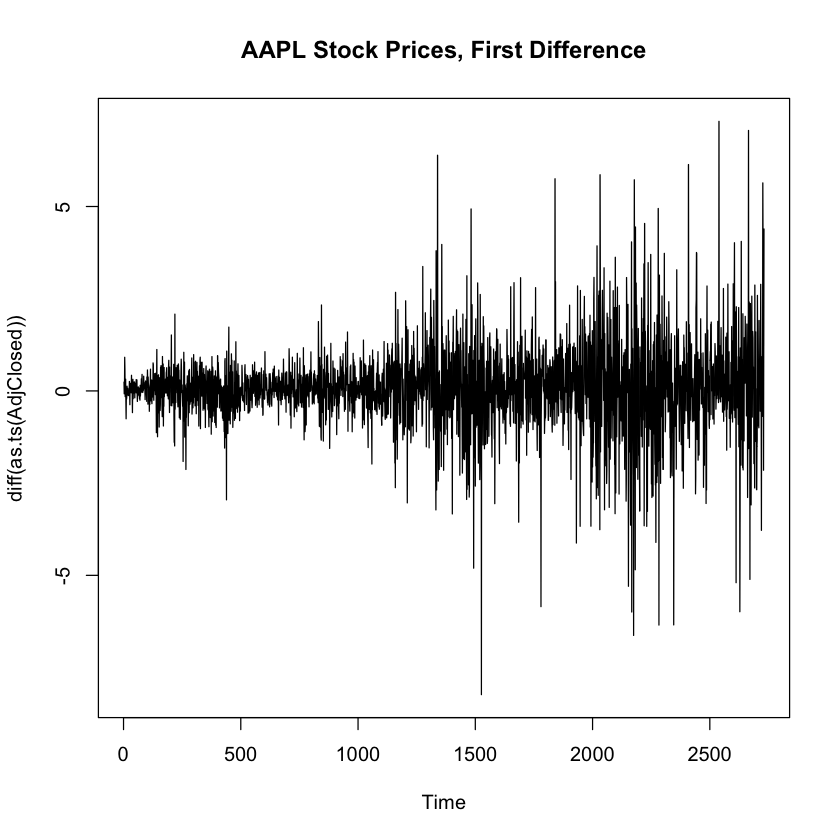

In [71]:
plot(diff(as.ts(AdjClosed)), main = 'AAPL Stock Prices, First Difference')

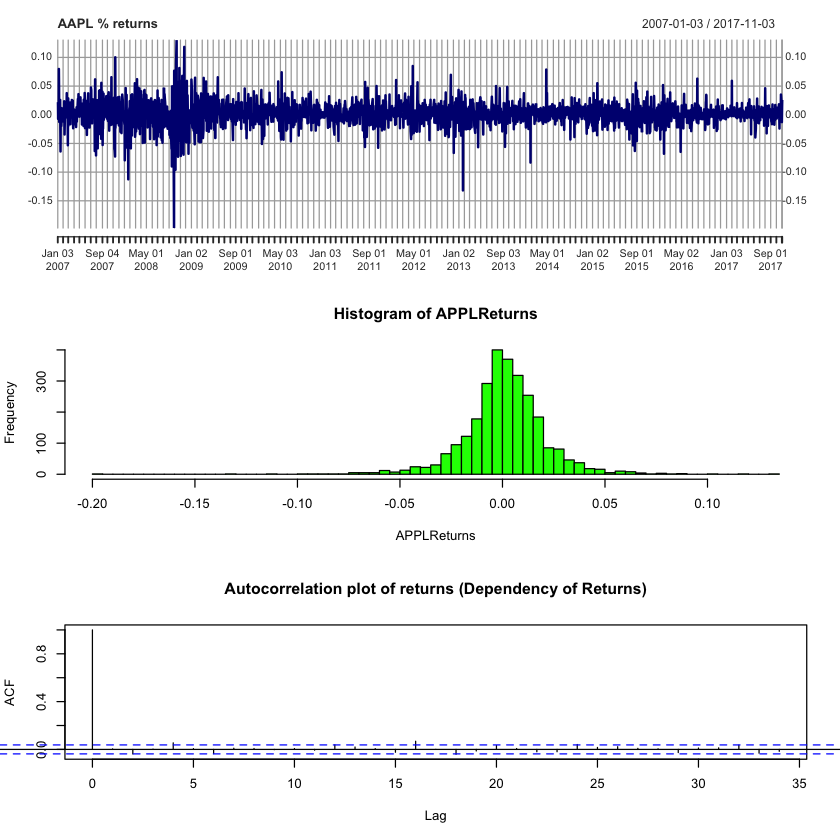

In [88]:
# APPL % Daily Returns
par(mfrow = c(3,1))
APPLReturns = diff(log(AdjClosed), 1)
plot(APPLReturns, main = "AAPL % returns", col = "navyblue")
hist(APPLReturns , breaks = 100, col="green")
acf(APPLReturns[-1], main = "Autocorrelation plot of returns (Dependency of Returns)")

AAPL % returns series is stationary as it quickly dropped to zero, and the histogram of APPL returns also show that the percentage of return is mostly concentrated around 0. The autocorrelation plot shows that today's stock price does not dependent on yesterday's stock price. 

In [73]:
# Mean Returns
meanReturns  =  mean(APPLReturns[-1])
meanReturns

[1] 0.001015977

In [74]:
# Standard Deviation of Returns
stddR =  sd(APPLReturns[-1])
stddR

[1] 0.02020071

In [75]:
# Distribution of Daily Returns 
probs = c(.005, .025, .25, .5, .75, .975, .995)
distMeanReturns = quantile(APPLReturns, probs= probs, na.rm = TRUE)
distMeanReturns

0.5%         2.5%          25%          50%          75%        97.5% 
-0.068538326 -0.041831375 -0.007906556  0.001007705  0.011341981  0.040359325 
       99.5% 
 0.064904687

The median daily log return 95% confidence interval is between -0.042 and 0.040.

In [76]:
# The Actual % Return of AAPL
(exp(meanReturns)-1) * 100

[1] 0.1016493

Thus, the mean daily return is 0.1016% more than the previous daily price. Although this number is small, it compounds daily at an expoential rate. 

The NYSE nad NASDAQ have 252 trading days on average per year. Let's suppose we want to simulate AAPL's stock price in the next 1000 days. 

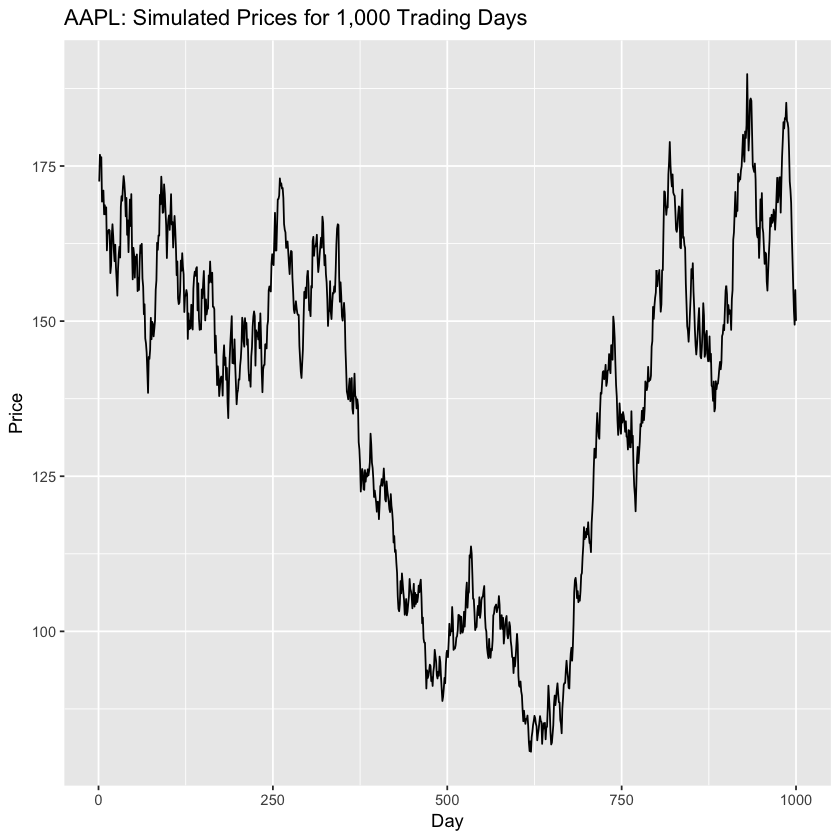

In [77]:
# Random Walk Simulation for Stock Prices
par(mfrow = c(1,1))
N = 1000 # 1000 trading days
mu = meanReturns 
sigma = stddR
day =  1:N
priceInit = AAPL$AAPL.Adjusted[[length(AAPL$AAPL.Adjusted)]] # the latest daily price
# Simulate prices
set.seed(386) 
price  =  c(priceInit, rep(NA, N-1))
for(i in 2:N) {
    price[i] =  price[i-1] * exp(rnorm(1, mu, sigma)) # new price 
}
priceSim =  data.frame(day, price)
# Visualize price simulation using ggplot
library(ggplot2)
ggplot(priceSim, aes(x=day, y=price)) + 
    geom_line() + 
    labs(y="Price", 
         x="Day", 
         title="AAPL: Simulated Prices for 1,000 Trading Days")

This single random walk tells us that investing money in AAPL is not a good idea as there are many dips going on in this simulation over the 1000 trading days. 

Read more on this random walk model : http://www.math.ucla.edu/~caflisch/181.1.03f/Lect4-5.pdf

However, the above is just a single random walk simulation -- one of many probabilistic outcomes. We can use Monte Carlo simulation to perform the above random walk process hundres or even thousands of times. 

In [78]:
# Monte Carlo Simulation
# Parameters
N = 252 # Number of Stock Price Simulations
M = 500 # Number of Monte Carlo Simulations
mu = meanReturns 
sigma = stddR
day =  1:N
priceInit = AAPL$AAPL.Adjusted[[length(AAPL$AAPL.Adjusted)]] 
# Simulate prices
set.seed(123)
monteCarlo =  matrix(nrow = N, ncol = M)
for (j in 1:M) {
    monteCarlo[[1, j]] = priceInit 
    for(i in 2:N) {
       monte_carlo_mat[[i - 1, j]] * exp(rnorm(1, mu, sigma))
    }
}

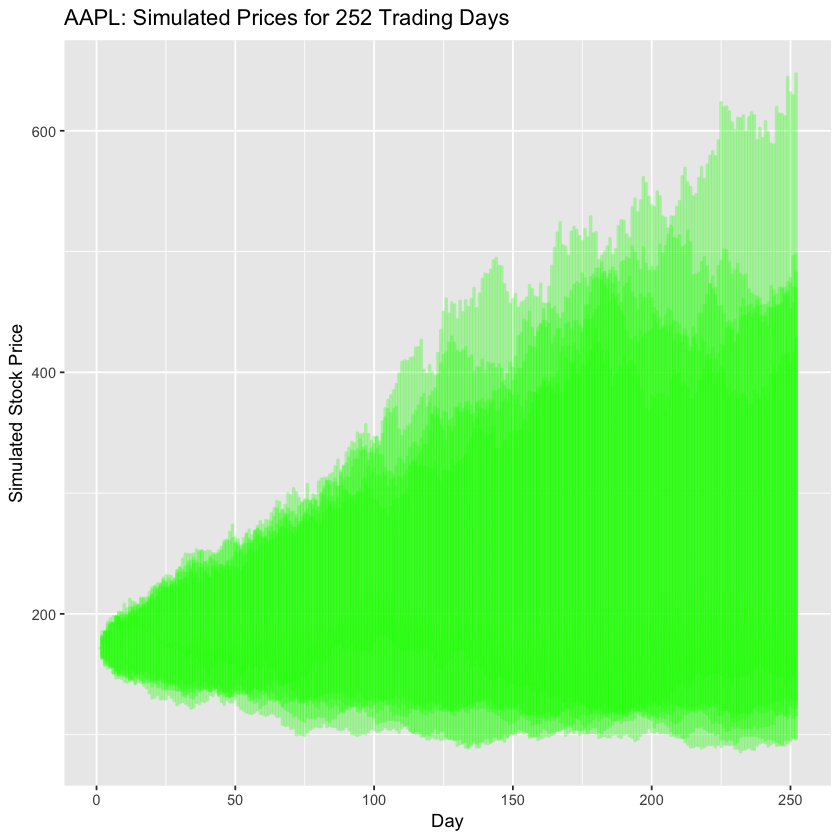

In [16]:
# Visualize the simulation 
library(reshape2)
library(ggplot2)
df = data.frame(day, monteCarlo)
long = melt(df, id="day")  # convert to long format
ggplot(long, aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="AAPL: Simulated Prices for 252 Trading Days")

In [17]:
# Looking at the last day's stock price of each simulation
probs = c(.005, .025, .25, .5, .75, .975, .995)
dist = quantile(df$X252, probs = probs)
dist

0.5%     2.5%      25%      50%      75%    97.5%    99.5% 
167.2567 182.3402 204.0829 245.2102 354.7287 438.4774 446.9181

On the last day of the simulation, the 95% confidence interval is between \$182.34 - \$438.48, with a median estimated price of $238.73.

# Portfolio Simulation

Here I am going to analyze my boyfriend's portfolio. He is in the tech industy, so his investments are mostly in tech companies. 

pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols


[1] "AAPL" "NVDA" "BABA" "AMD"  "GLW"  "LMT"  "RTN"  "BA"

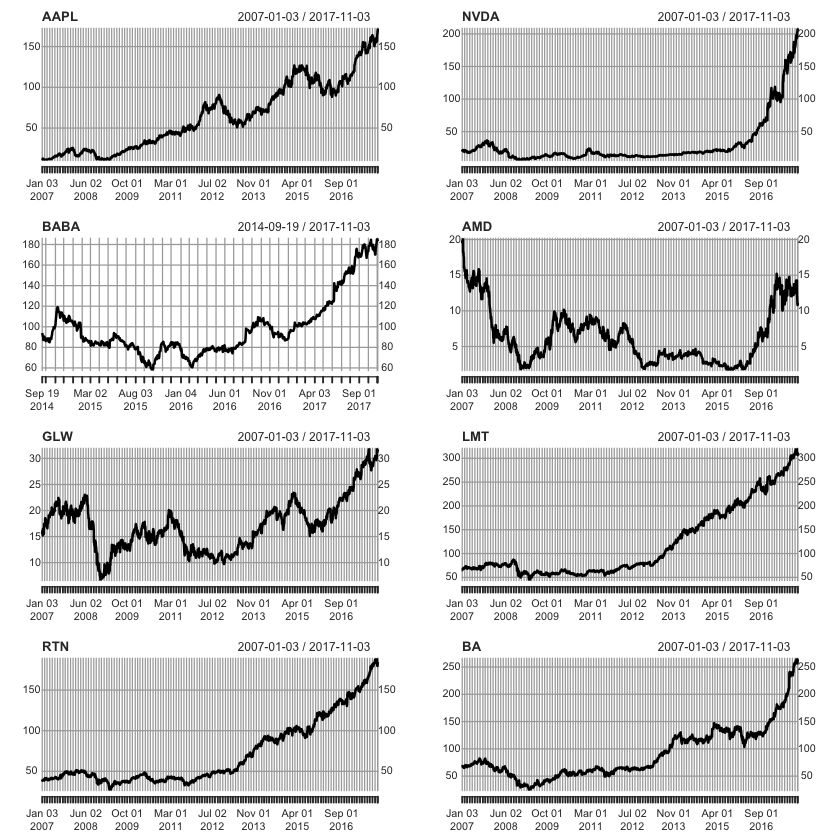

In [66]:
 require(MASS)
 require(quantmod)
 
 # Load a few symbols into memory
 getSymbols(c("AAPL", "NVDA", "BABA", "AMD", "GLW", "LMT", "RTN", "BA"))
 
 # Plot the prices of these stocks 
 par(mfrow = c(4,2))
 plot(AAPL[,6], main = "AAPL")
 plot(NVDA[,6], main = "NVDA")
 plot(BABA[,6], main = "BABA")
 plot(AMD[,6], main = "AMD")
 plot(GLW[,6], main = "GLW")
 plot(LMT[,6], main = "LMT")
 plot(RTN[,6], main = "RTN")
 plot(BA[,6], main = "BA")

The financial crisis in 2008 had a great hit on American firms, i.e., Apple, Advanced Micro Devices, Corning, Lockheed Martin Corporation, Raytheon, and Boeing. Alibaba was not affected since it made its initial public offering in 2014. 

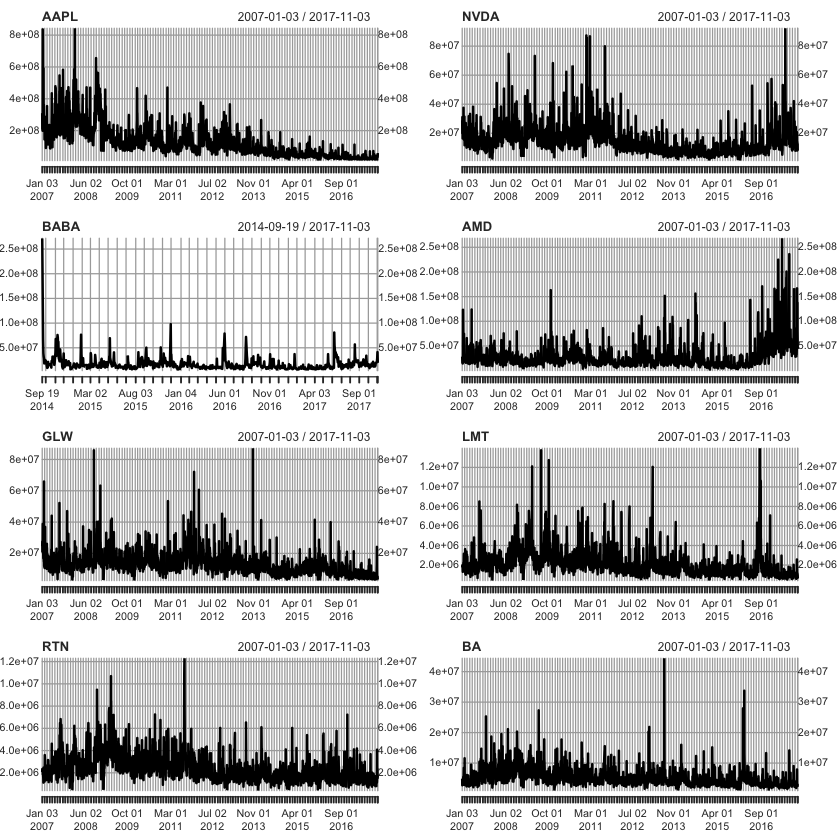

In [19]:
 # Trading Volume
 par(mfrow = c(4,2))
 plot(AAPL[,5], main = "AAPL")
 plot(NVDA[,5], main = "NVDA")
 plot(BABA[,5], main = "BABA")
 plot(AMD[,5], main = "AMD")
 plot(GLW[,5], main = "GLW")
 plot(LMT[,5], main = "LMT")
 plot(RTN[,5], main = "RTN")
 plot(BA[,5], main = "BA")

Why Volume?

Volume is the number of shares traded over a designated period. High volume indicates an active market and buyer interest is strong. Low volume reflects a lack of faith in the company. Volume typically follows a trend -- expanding on rallies and decreasing on reactions. Volume is useful to see how strong a change in expectations really is. 

Here we can see Apple's volume is declining. This is possibility due to the lack of interest of the new iPhones. This potentially affected the trading volume of its supplier, Corning. In fact, the correlation for Apple adjusted closing price and Corning's adjusted closing price is 0.58. Advanced Micro Devices' trading volume is increasing as its stock price improves. BABA's trading volume is constant despite its high IPO volume. 

In [20]:
# Find their respective returns based on adjusted closing prices
prices = cbind(AAPL[,6], NVDA[,6], BABA[,6], AMD[,6], GLW[,6], LMT[,6], RTN[,6], BA[,6])
returns = apply(prices,2,function(x) diff(log(x)))

In [21]:
# Display the first 5
head(returns, n=5)

,AAPL.Adjusted,NVDA.Adjusted,BABA.Adjusted,AMD.Adjusted,GLW.Adjusted,LMT.Adjusted,RTN.Adjusted,BA.Adjusted
2007-01-04,0.021953106,-0.004722706,NA,0.01373723,0.035951130,-0.0026140349,-0.015081727,0.004029246
2007-01-05,-0.007146873,-0.064705743,NA,-0.00405074,-0.025921484,0.0035927339,0.005828004,-0.004253170
2007-01-08,0.004926086,0.007399957,NA,-0.01225130,-0.021232408,0.0179850964,-0.010318721,-0.002358504
2007-01-09,0.079799839,-0.019655230,NA,0.00920257,-0.009703552,-0.0009611257,0.009543241,-0.010625860
2007-01-10,0.046745805,0.048145611,NA,0.01815481,0.026724878,0.0104161915,0.008108090,0.014329184


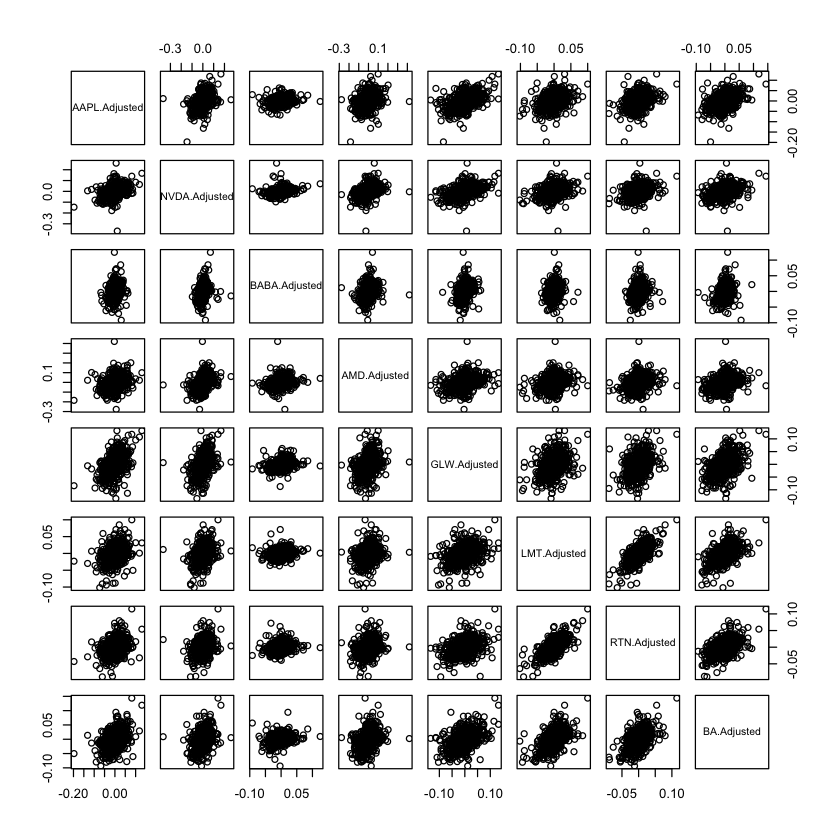

In [8]:
# Pairwise Charts to plot out the scatterplots 
pairs(returns)

In [22]:
# Correlation Matrix 
cor(returns)

,AAPL.Adjusted,NVDA.Adjusted,BABA.Adjusted,AMD.Adjusted,GLW.Adjusted,LMT.Adjusted,RTN.Adjusted,BA.Adjusted
AAPL.Adjusted,1.0000000,0.4222427,NA,0.3299176,0.4582354,0.3547973,0.3649621,0.4161000
NVDA.Adjusted,0.4222427,1.0000000,NA,0.4419173,0.4769083,0.3220669,0.3295968,0.3799094
BABA.Adjusted,NA,NA,1,NA,NA,NA,NA,NA
AMD.Adjusted,0.3299176,0.4419173,NA,1.0000000,0.3838014,0.2705666,0.2757785,0.3479500
GLW.Adjusted,0.4582354,0.4769083,NA,0.3838014,1.0000000,0.3846312,0.4197686,0.4998704
LMT.Adjusted,0.3547973,0.3220669,NA,0.2705666,0.3846312,1.0000000,0.7158584,0.5606314
RTN.Adjusted,0.3649621,0.3295968,NA,0.2757785,0.4197686,0.7158584,1.0000000,0.5701157
BA.Adjusted,0.4161000,0.3799094,NA,0.3479500,0.4998704,0.5606314,0.5701157,1.0000000


Lockheed Martin (LMT) and Raytheon (RTN) have a correlation of 0.715 because they are both defense contractors. Their net incomes are both in the billions. More interestingly, Boeing (BA) has a 0.56 correlation with LMT and 0.57 correlation with RTN. Boeing, Lockeheed, and Raytheon are all defense contractors, and they have joint ventures together. That expains why their stock prices tend to correlate with each other. 

In [60]:
# Monte Carlo Simulation

# Parameters
N = 252 # Number of Stock Price Simulations
M = 500 # Number of Monte Carlo Simulations

adjPrices = prices[,1:8]
returns = apply(prices,2,function(x) diff(log(x)))
day =  1:N
# Mean and sd of the returns
meanReturns = matrix(nrow = 1, ncol = 8)
sdReturns = matrix(nrow = 1, ncol = 8)
for (i in 1:8) {
    meanReturns[1, i] = mean(returns[,i], na.rm=TRUE)
    sdReturns[1, i] = sd(returns[i,], na.rm=TRUE)
}
meanReturns

# The latest daily price
priceInit = matrix(nrow = 1, ncol = 8)
for (i in 1:8) {
    priceInit[1, i] = prices[length(prices[,i]),i, na.rm=TRUE]
}
priceInit
    
# Simulate prices
set.seed(123)
AAPLMonteCarlo =  matrix(nrow = N, ncol = M)
NVDAMonteCarlo =  matrix(nrow = N, ncol = M)
BABAMonteCarlo =  matrix(nrow = N, ncol = M)
AMDMonteCarlo =  matrix(nrow = N, ncol = M)
GLWMonteCarlo =  matrix(nrow = N, ncol = M)
LMTMonteCarlo =  matrix(nrow = N, ncol = M)
RTNMonteCarlo =  matrix(nrow = N, ncol = M)
BAMonteCarlo =  matrix(nrow = N, ncol = M)
    
# AAPL
for (j in 1:M) {
    AAPLMonteCarlo[[1, j]] = priceInit[1,1]
    for(i in 2:N) {
    AAPLMonteCarlo[[i, j]] =  AAPLMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,1], sdReturns[1,1]))
    }
}
AAPLMonteCarlo

# NVDA
for (j in 1:M) {
    NVDAMonteCarlo[[1, j]] = priceInit[1,2]
    for(i in 2:N) {
    NVDAMonteCarlo[[i, j]] =  NVDAMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,2], sdReturns[1,2]))
    }
}
NVDAMonteCarlo
    
# BABA
for (j in 1:M) {
    BABAMonteCarlo[[1, j]] = priceInit[1,3]
    for(i in 2:N) {
    BABAMonteCarlo[[i, j]] =  BABAMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,3], sdReturns[1,3]))
    }
}
BABAMonteCarlo
    
# AMD
for (j in 1:M) {
    AMDMonteCarlo[[1, j]] = priceInit[1,4]
    for(i in 2:N) {
    AMDMonteCarlo[[i, j]] =  AMDMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,4], sdReturns[1,4]))
    }
}
AMDMonteCarlo

# GLW
for (j in 1:M) {
    GLWMonteCarlo[[1, j]] = priceInit[1,5]
    for(i in 2:N) {
    GLWMonteCarlo[[i, j]] =  GLWMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,5], sdReturns[1,5]))
    }
}
GLWMonteCarlo

# LMT
for (j in 1:M) {
    LMTMonteCarlo[[1, j]] = priceInit[1,6]
    for(i in 2:N) {
    LMTMonteCarlo[[i, j]] =  LMTMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,6], sdReturns[1,6]))
    }
}
LMTMonteCarlo
    
# RTN
for (j in 1:M) {
    RTNMonteCarlo[[1, j]] = priceInit[1,7]
    for(i in 2:N) {
    RTNMonteCarlo[[i, j]] =  RTNMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,7], sdReturns[1,7]))
    }
}
RTNMonteCarlo
    
# BA
for (j in 1:M) {
    BAMonteCarlo[[1, j]] = priceInit[1,8]
    for(i in 2:N) {
    BAMonteCarlo[[i, j]] =  BAMonteCarlo[[i - 1, j]] * exp(rnorm(1, meanReturns[1,8], sdReturns[1,8]))
    }
}
BAMonteCarlo

0.001015977,0.0008188898,0.0008483619,-0.0002061151,0.0002610878,0.0005701257,0.000567686,0.0004940213


172.5,208.69,183.21,11.12,31.67,309.99,184.71,261.75


172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,⋯,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000,172.5000
170.9930,170.9888,175.8004,173.3219,165.1544,169.6785,173.7832,173.2555,178.9585,173.6324,⋯,173.2495,170.6003,177.1067,173.4169,170.7118,168.9737,172.6614,175.2184,169.6906,178.1051
170.4800,170.1374,178.3031,172.9349,168.3548,166.6033,171.3218,171.4548,177.3942,173.7189,⋯,174.2865,178.1507,179.4826,168.8263,170.8745,172.2123,172.0418,173.4112,170.4935,178.3279
175.3636,170.5798,173.8406,172.7470,169.2627,168.5061,174.5926,173.3417,175.0001,171.2743,⋯,172.0781,176.9767,180.9734,172.8605,172.8095,170.8540,173.4701,177.0455,167.8097,181.5728
175.7582,175.5884,173.7283,176.0093,176.7391,168.3251,177.5542,170.3031,177.1875,169.1453,⋯,173.8166,178.8946,178.4833,172.1621,173.8571,172.0833,178.2281,177.1081,167.6402,184.9455
176.3347,175.4952,171.2043,175.5693,179.0491,168.7142,176.9965,165.6236,178.7401,166.2049,⋯,175.0573,179.1515,182.1392,172.2839,178.1185,173.3524,178.4499,182.2484,170.3577,190.3688
181.8822,179.0217,165.2900,169.6020,177.8372,171.0868,172.4200,165.6665,181.2865,167.6469,⋯,175.0676,177.3896,181.6500,168.7430,174.0663,172.9799,179.3781,182.4030,167.6219,194.8331
183.5389,181.1891,165.8924,169.1945,186.9330,173.5291,174.9059,165.7347,180.5917,169.4996,⋯,178.6403,176.6281,181.9224,171.7986,177.2281,173.9785,180.1099,180.7305,166.6831,194.8922
179.7099,181.0136,165.8314,170.9710,196.6136,172.9103,178.5713,172.9007,184.3555,170.7914,⋯,182.2845,179.6712,185.1511,172.5147,170.5256,175.9492,178.6069,182.5002,165.5880,190.9435
177.7471,176.4100,165.7179,172.9977,192.6678,172.1437,177.8337,169.4378,180.8012,168.4661,⋯,179.4091,189.2701,186.2360,174.7416,171.3969,178.2818,177.5785,184.4785,164.8423,191.0802
176.5480,174.9891,166.5139,175.0488,194.4503,172.5403,179.6898,170.1172,180.8306,163.4569,⋯,177.0916,194.6310,188.7677,170.7756,172.9569,176.9615,179.2567,190.1409,161.9716,190.4874


208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,⋯,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900,208.6900
202.4475,212.9942,201.9836,221.5079,206.6813,195.9704,209.4122,210.9473,206.7931,212.8711,⋯,201.7885,207.2561,210.7327,210.7509,206.2867,207.6687,200.4210,214.7695,208.0591,209.6460
206.3171,200.9396,205.8400,223.8875,206.5138,200.3384,217.7469,215.4822,202.7090,215.0276,⋯,202.0185,207.0489,211.7624,209.9857,204.9513,200.2177,196.8383,211.4312,198.2037,214.5673
207.5277,190.1475,204.3813,226.2106,208.0070,207.8326,213.1835,217.9232,206.5008,214.1289,⋯,197.6755,217.2529,213.3502,213.7490,200.8789,196.0570,188.2993,205.7169,195.2305,222.7346
196.1105,203.0501,211.6024,231.9411,215.9996,207.0833,214.5951,217.1044,204.3568,210.3826,⋯,190.6440,218.5593,208.6583,209.5273,201.5473,203.3271,189.0481,209.1924,190.6134,230.0123
186.8662,204.9575,213.6386,227.8830,213.9510,218.0013,221.7204,219.5224,207.7086,208.7271,⋯,190.8992,215.9025,207.3904,213.7505,207.0278,200.7553,185.9929,209.5538,190.0201,222.9636
192.8036,209.6936,209.5656,224.7134,215.4012,218.5759,218.3267,223.2891,206.4787,208.6906,⋯,182.5958,213.3326,208.5378,209.9029,210.4487,202.6218,193.6352,204.9652,187.0412,216.9655
191.8506,202.3132,206.7341,229.7776,215.3766,214.9665,220.0521,217.0464,202.9225,205.2038,⋯,185.0386,212.7603,207.2654,206.9778,208.8041,200.6748,197.0263,206.2412,192.7210,223.5579
193.8400,206.9517,211.3845,239.0143,211.6172,213.8553,216.6164,215.6475,197.1793,201.6077,⋯,193.1001,216.1364,206.7008,210.2555,215.4364,192.7662,204.5154,203.3051,197.3037,240.8938
187.8448,205.9520,207.1970,240.6156,214.8444,213.2646,223.8130,213.0599,210.0516,201.7110,⋯,187.1480,220.0253,206.3407,214.8458,207.0915,188.0966,205.4229,206.4385,192.3550,241.4420
185.6331,214.2839,211.0498,238.3922,204.5064,214.1572,227.3839,210.0362,216.7780,201.7136,⋯,190.0051,221.9050,205.6293,217.6726,205.8596,190.7640,205.3583,209.7420,187.3170,233.8250


183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,⋯,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100,183.2100
182.3421,184.7150,183.9095,177.8876,185.1009,182.7186,182.7541,181.8429,180.7660,183.0882,⋯,187.9411,183.7945,181.3404,185.3844,183.5695,184.0319,182.6974,183.1638,178.8383,184.8968
184.1588,182.9053,183.7740,175.6194,185.5880,181.6289,181.4984,180.9286,181.3154,188.2509,⋯,188.2325,185.7830,185.1135,186.1836,185.9536,185.1354,182.3642,185.3566,180.9998,185.4880
181.8355,181.6498,182.5868,174.4669,184.5085,177.3767,179.2202,182.8120,178.5910,187.2889,⋯,188.1438,191.7247,184.9239,189.6881,189.2853,184.5671,184.4692,183.7029,181.7298,186.5672
182.9941,178.4735,180.5435,177.8626,187.2698,176.5144,180.8291,181.7821,177.2913,186.6611,⋯,190.4788,192.1774,187.0178,188.2519,185.8962,184.0807,186.7096,182.1304,180.5449,184.8679
185.4659,175.9901,178.3419,177.4553,184.9513,174.7395,176.9192,181.9275,175.0560,187.1271,⋯,188.7263,189.2981,190.2623,189.3837,188.1966,183.2934,184.0008,185.2932,182.3435,182.5791
185.3672,173.8794,176.6112,175.0198,185.9615,174.9673,179.6093,181.2628,171.3843,191.7575,⋯,187.1386,184.5971,192.1824,193.2397,190.3043,182.1793,186.7587,185.2955,182.9957,184.9820
186.1479,171.6293,175.2151,177.5579,188.3908,173.6963,178.0193,184.0195,173.0732,195.2098,⋯,185.6311,182.4147,194.3919,191.7229,191.5841,180.6025,187.2452,184.5465,180.3529,182.9430
188.3024,174.6371,170.1587,178.6712,190.5360,173.6257,175.1978,182.3447,175.0781,192.6414,⋯,189.5797,180.2639,197.5787,196.5236,189.2766,184.1669,190.3125,182.7399,179.2829,186.7868
190.9102,177.6526,168.1640,182.3469,190.6882,175.3030,174.8174,182.1777,176.3558,193.3147,⋯,187.7904,179.1193,195.0978,196.9872,187.8438,184.8171,186.9700,181.8166,175.0358,186.7327
190.2118,173.8552,167.7236,182.0838,187.7229,173.8595,173.9631,178.6309,177.7014,198.5496,⋯,182.4376,179.4884,197.8195,194.5791,188.9436,187.7993,187.8687,182.9519,177.1343,190.7998


11.120000,11.120000,11.120000,11.12000,11.120000,11.12000,11.12000,11.120000,11.120000,11.120000,⋯,11.120000,11.120000,11.120000,11.12000,11.120000,11.120000,11.12000,11.12000,11.12000,11.120000
11.222615,10.351033,10.877066,11.22510,11.490386,11.52037,11.32197,10.902242,10.965453,10.497646,⋯,10.866290,11.319672,11.073614,11.05924,10.785980,10.926795,10.98527,11.33077,11.31464,10.710598
11.150571,10.859374,10.858135,10.66274,11.441178,12.25242,10.95886,10.618874,11.301833,10.342183,⋯,10.712342,12.412781,10.853191,11.21323,10.817025,10.788231,10.88119,10.92825,10.67691,10.381104
10.706607,10.628445,10.572129,10.39898,11.125280,12.84776,11.34176,11.063615,11.095787,10.059593,⋯,10.392145,12.344360,10.649527,11.28868,11.460987,11.273068,11.50730,11.16162,10.79735,9.812226
11.288793,10.910909,10.885089,10.39405,10.588027,13.23241,11.04749,11.245256,10.993554,10.479079,⋯,10.443650,12.061326,10.683623,11.59892,11.743620,11.165771,11.62397,11.94618,10.75187,9.725126
10.268669,10.558760,10.691134,11.01853,11.076829,12.89881,11.23095,10.623893,10.913370,10.401339,⋯,10.193992,11.077852,10.191203,11.65441,11.678661,11.685896,11.51852,12.09440,10.97087,9.464753
10.061269,10.378837,10.482857,11.33706,11.048799,12.56180,11.10029,10.456541,10.458169,9.979046,⋯,10.185509,11.442679,10.257319,12.11447,11.296974,11.859187,11.44079,12.83072,10.95293,9.149747
11.024507,9.871028,10.625175,11.56452,10.537975,12.62056,10.72865,10.086247,9.803111,9.958665,⋯,10.299456,11.422674,10.626533,11.48868,11.219401,11.290635,11.60281,12.58976,10.80464,9.655422
10.609439,9.779197,10.034393,11.87290,9.488584,11.96117,10.87812,10.263305,9.740786,10.376936,⋯,10.222795,11.534680,10.412578,11.78652,11.586917,10.777713,12.20121,11.85457,11.13014,9.345108
10.695183,10.075338,9.971795,12.04108,8.992221,12.36521,11.34145,9.673768,9.527919,10.382498,⋯,9.926382,11.463333,10.501730,11.81681,11.121097,10.485832,11.76630,12.39881,12.12911,9.643120
10.948177,10.163195,9.734306,12.37882,8.577459,11.86471,11.51394,9.538817,9.409762,10.104024,⋯,10.076668,11.110950,9.980617,11.36778,11.118979,10.508253,11.91105,12.74473,12.44974,9.792258


31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,⋯,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000,31.67000
31.64048,32.27158,31.64111,31.91926,32.68383,32.10546,32.45448,31.52241,31.91786,32.89571,⋯,32.73944,32.26138,32.01856,31.01293,31.70670,32.04622,31.67012,32.07435,32.51451,32.35474
31.84195,32.02808,32.12104,31.66825,32.07010,32.06431,32.94639,32.70248,30.56317,33.48971,⋯,32.61004,32.15893,32.06209,30.52119,31.14063,32.27814,32.64398,32.51626,31.66137,33.47905
32.32626,32.20683,31.18707,30.91605,30.64409,31.78199,33.76352,32.68207,30.35188,33.91661,⋯,32.57150,32.05109,31.95615,30.63600,31.06653,32.43847,32.98027,33.56390,32.32140,32.42204
32.06509,32.94739,31.18361,30.82865,30.56485,31.98068,33.37008,33.43776,30.56226,34.02566,⋯,32.67669,31.89481,33.03878,29.56478,30.12909,32.58403,32.26706,32.27438,32.03801,32.51035
31.77913,33.38168,32.66696,30.94322,30.20407,31.52626,33.18442,33.32874,30.53782,33.00471,⋯,33.42600,31.26627,32.15763,30.25651,29.48312,31.97479,32.14755,32.06804,31.94202,32.88955
31.59780,34.14949,33.11258,29.68630,30.24762,31.67498,33.48945,32.29857,30.82637,33.40878,⋯,33.53448,32.25027,32.08921,30.40732,29.21594,31.76663,32.44700,32.39083,31.59021,31.43790
31.91857,33.67984,34.77335,29.17704,30.92864,32.17467,34.30628,31.55175,31.11503,33.27892,⋯,34.03321,32.13323,32.16876,30.06313,29.40097,31.34667,32.55946,32.58827,31.32238,30.33514
31.62138,32.68136,35.26124,29.45764,31.98764,31.92828,33.95741,31.36253,31.54460,33.64665,⋯,34.08504,31.54730,32.89617,30.62131,29.06060,31.00740,31.87513,32.58984,30.65901,29.59751
32.32767,32.12146,35.20818,29.00808,32.51664,32.19776,34.39704,31.08253,32.22676,32.88455,⋯,32.85876,31.70741,33.10117,30.50363,29.23331,30.91420,32.69849,31.50317,31.46110,29.56850
32.08656,32.16166,35.64884,29.34464,33.24296,31.93556,35.78081,31.42550,32.54638,34.53869,⋯,32.01599,32.05873,32.90541,31.02469,28.61898,31.35610,33.54158,31.75764,31.78563,29.73076


309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,⋯,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900,309.9900
310.3795,311.7105,308.7712,313.6476,311.4244,309.0492,312.2096,311.7004,313.3527,307.1751,⋯,313.1126,304.9777,318.1372,312.4153,310.5998,312.1089,306.9099,307.7042,307.5048,299.9596
312.6814,309.1020,312.4343,313.0963,309.7727,306.9863,315.9567,313.8143,313.2223,304.0072,⋯,306.8315,307.6247,329.2965,312.8351,312.1372,315.9612,308.2610,304.9597,307.9544,305.5704
309.7417,310.1615,310.7954,311.8862,310.9558,295.5731,317.0353,314.4246,315.0831,310.6366,⋯,302.6464,309.2541,331.1619,313.2763,311.5994,317.3063,304.9017,302.6770,306.6520,306.9864
317.6955,310.3037,307.9260,311.2353,311.4360,296.4940,320.9636,312.3658,313.0188,314.1313,⋯,306.0331,301.2797,325.9111,313.1640,308.6715,320.9511,306.3715,309.2309,303.8100,309.1850
320.2174,312.7339,308.7667,318.9637,310.5086,299.6084,323.9609,315.8124,313.1567,315.5997,⋯,306.9181,302.2382,322.6200,309.3609,307.4905,328.5971,303.9654,308.4691,306.4957,305.8993
312.0625,313.5584,309.7494,318.1753,306.1728,297.0084,331.1231,322.8387,316.0125,317.3649,⋯,299.4166,303.3612,322.5194,309.8393,310.0104,328.0211,310.1351,307.8823,300.7384,308.8478
314.6709,313.0598,306.8804,321.3464,302.0190,293.6448,332.1972,325.8701,316.2167,321.2441,⋯,300.9919,299.2661,322.4931,305.2538,312.0238,332.8870,307.7813,309.5321,301.8233,316.4783
315.2792,310.4992,304.1684,321.4451,307.0675,293.0776,332.8770,332.7251,317.6427,323.4402,⋯,302.3638,299.7449,326.5925,300.3087,319.8829,338.4930,303.7553,310.4400,299.0614,321.7960
315.3872,315.6863,303.6271,318.3309,308.3038,292.4694,333.2420,339.1347,318.4801,322.8497,⋯,299.2398,300.5717,323.7233,294.2284,314.1775,340.8393,294.4147,308.4845,299.0919,321.5421
316.8921,319.2555,305.3438,318.3987,304.6847,294.7751,336.7945,338.0041,317.4705,315.3228,⋯,304.1975,304.2478,318.8594,295.1236,316.7029,336.3151,291.3401,313.1047,296.4298,323.4287


184.71001,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,⋯,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100,184.7100
178.78438,171.3033,187.8955,183.5721,173.7345,195.5243,187.2794,190.9518,192.0335,189.9377,⋯,183.6768,179.5855,192.0225,176.7352,186.7841,183.3105,170.8874,189.9842,172.1412,173.7083
178.22591,180.6373,177.6362,183.1436,176.4687,189.2035,178.1956,187.4784,201.0088,193.4957,⋯,176.7170,178.8918,203.9109,162.3528,178.6196,180.0614,182.4313,199.1403,166.1343,173.0078
162.89894,184.9008,180.9739,195.2934,177.3618,180.7661,181.7680,195.6418,206.3915,196.2450,⋯,181.4172,184.2435,209.4415,168.9722,170.6617,180.4961,182.3991,195.7635,158.0472,176.1161
156.82913,188.6810,177.5237,172.8030,168.1887,174.6700,188.9614,192.5092,207.1472,182.4202,⋯,189.6413,187.6708,216.5781,169.4520,166.5744,179.4872,195.7732,196.2865,151.3298,181.5190
139.53594,178.8927,187.2044,172.3503,166.2407,176.0911,184.6342,205.6048,214.3191,175.9923,⋯,186.3361,196.1199,214.8241,153.9435,166.3354,181.4168,190.7821,202.1644,144.4650,185.5828
139.84002,195.6922,196.0808,165.5463,177.8884,175.7615,183.6432,204.1245,202.7822,172.3500,⋯,179.6622,208.0228,206.6408,153.9231,178.2127,173.0245,193.0307,194.4875,145.8634,178.1763
137.28222,207.0120,190.2358,164.3174,180.8317,177.7363,193.0610,228.6080,196.3786,182.1707,⋯,168.9869,206.3133,194.5280,147.5156,169.7746,169.8006,196.9569,189.5250,152.7596,178.1765
141.11752,194.8138,191.8950,162.0956,192.2531,168.2707,188.0933,230.8372,201.7692,188.7638,⋯,178.6108,200.1908,194.3715,145.9354,176.2876,156.1740,207.2206,197.6036,161.1776,183.8560
139.42293,196.5116,188.0336,167.9822,191.3318,165.5141,197.5486,219.3043,206.6377,187.3341,⋯,178.7434,205.1453,196.1122,147.4300,174.5806,150.3430,212.8480,201.2299,159.4530,173.5950
125.82891,195.8692,199.6751,166.4697,192.0934,168.4597,200.3047,218.2341,222.2274,187.4405,⋯,183.6148,201.5085,203.9501,149.9570,179.3459,142.8504,196.5060,192.7484,157.0139,164.9724


261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,⋯,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500,261.7500
260.5897,257.7065,263.4156,260.9731,262.7939,262.5655,262.0100,266.9891,260.7794,261.5893,⋯,263.0693,262.7959,262.0197,256.8371,260.7339,263.7975,259.2555,266.1334,260.5841,261.7222
260.9068,261.5115,266.3627,260.8123,260.0453,263.1843,262.1545,265.1142,258.8303,264.2954,⋯,264.1531,262.9249,259.9882,255.2804,262.3770,262.7108,260.6438,269.8986,259.3940,261.5418
262.4871,262.8767,266.7664,258.2530,260.2906,263.5883,264.0089,263.7743,258.2648,270.2515,⋯,259.3597,263.0691,258.4108,251.1722,261.8849,264.3341,262.2445,269.3935,254.7509,261.5777
262.4023,263.9304,267.5658,256.6195,259.7327,266.4551,264.1345,265.6699,258.9292,269.8409,⋯,257.6307,262.6310,253.7272,246.8546,262.1767,269.0817,262.2545,273.7628,257.8929,259.8711
267.2946,262.5038,267.9671,259.8212,256.5398,267.9536,262.3220,265.2890,255.6422,265.5224,⋯,254.5583,263.9264,254.8769,250.7007,255.7178,267.9179,258.6760,271.8997,253.0054,256.2971
267.1305,264.7736,270.4484,259.9270,256.3349,267.1870,260.3770,263.5425,253.2641,262.3943,⋯,257.9636,263.8017,251.1632,249.4708,250.7364,267.2478,256.0241,273.8704,256.4915,255.5347
263.3479,265.9778,268.5296,259.0780,256.6211,268.7852,254.3473,263.2511,256.0609,266.9418,⋯,254.1232,265.0300,249.3816,248.4733,244.7711,265.9449,259.8051,271.2823,258.9801,250.3077
260.5597,263.2422,272.4772,256.7296,258.8397,272.4925,257.9507,261.9887,254.6158,265.7106,⋯,256.1286,264.6629,247.6278,245.8821,249.1879,265.2385,261.3028,272.5775,253.8986,250.2244
260.6547,261.3692,274.1267,255.9585,259.9202,274.3040,257.1690,260.4971,252.8142,264.5920,⋯,254.4351,264.0737,247.9028,251.2433,250.3524,265.0039,264.5684,266.0449,254.6063,252.4251
259.1595,261.4622,274.6179,259.2087,258.3093,276.4471,252.8619,263.4799,249.8994,265.3899,⋯,254.2770,258.7590,246.8397,251.6752,250.2123,265.0396,268.0032,262.5346,254.4623,250.5387


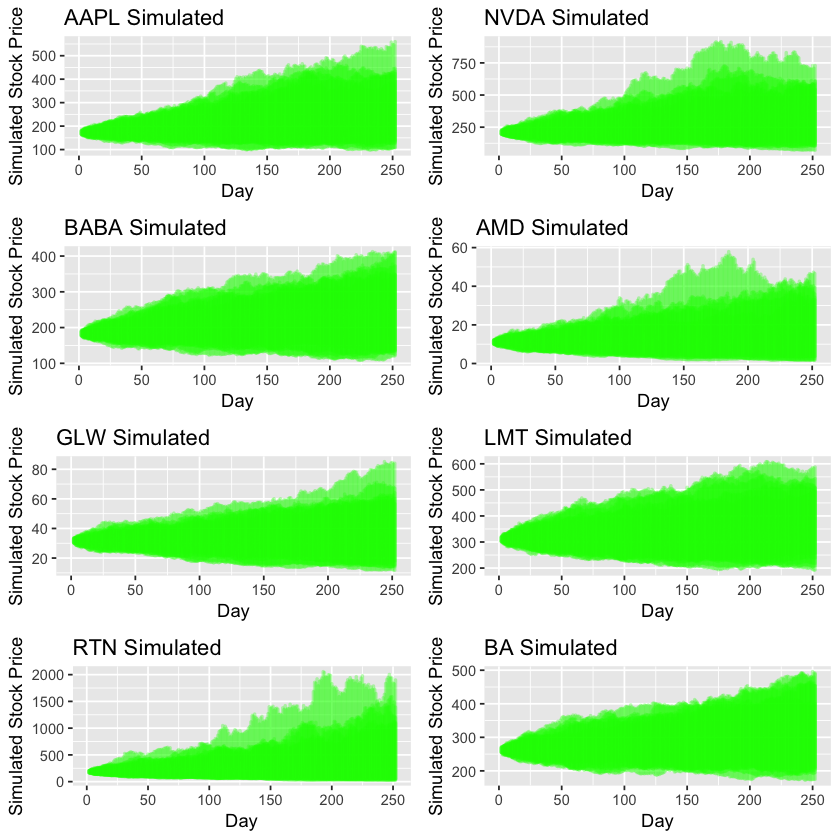

In [62]:
# Visualize the simulation 
library(reshape2)
library(ggplot2)
library(grid)

multiplot <- function(..., plotlist=NULL, cols) {
    require(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)

    # Make the panel
    plotCols = cols                          # Number of columns of plots
    plotRows = ceiling(numPlots/plotCols) # Number of rows needed, calculated from # of cols

    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(plotRows, plotCols)))
    vplayout <- function(x, y)
        viewport(layout.pos.row = x, layout.pos.col = y)

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
        curRow = ceiling(i/plotCols)
        curCol = (i-1) %% plotCols + 1
        print(plots[[i]], vp = vplayout(curRow, curCol ))
    }

}

# AAPL
AAPLdf = data.frame(day, AAPLMonteCarlo)
AAPLlong = melt(AAPLdf , id="day")  # convert to long format
g1 = ggplot(AAPLlong, aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="AAPL Simulated")

# NVDA
NVDAdf = data.frame(day, NVDAMonteCarlo)
NVDAlong = melt(NVDAdf, id="day")  # convert to long format
g2 = ggplot(NVDAlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="NVDA Simulated")

# BABA
BABAdf = data.frame(day, BABAMonteCarlo)
BABAlong = melt(BABAdf, id="day")  # convert to long format
g3 = ggplot(BABAlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="BABA Simulated")

# AMD
AMDdf = data.frame(day, AMDMonteCarlo)
AMDlong = melt(AMDdf, id="day")  # convert to long format
g4 = ggplot(AMDlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="AMD Simulated")

# GLW
GLWdf = data.frame(day, GLWMonteCarlo)
GLWlong = melt(GLWdf, id="day")  # convert to long format
g5 = ggplot(GLWlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="GLW Simulated")

# LMT
LMTdf = data.frame(day, LMTMonteCarlo)
LMTlong = melt(LMTdf, id="day")  # convert to long format
g6 = ggplot(LMTlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="LMT Simulated")

# RTN
RTNdf = data.frame(day, RTNMonteCarlo)
RTNlong = melt(RTNdf, id="day")  # convert to long format
g7 = ggplot(RTNlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="RTN Simulated")

# BA
BAdf = data.frame(day, BAMonteCarlo)
BAlong = melt(BAdf, id="day")  # convert to long format
g8 = ggplot(BAlong , aes(x=day, y=value)) + 
    geom_line(colour="green", size=1, alpha = 0.3) +
    labs(y="Simulated Stock Price", 
         x="Day", 
         title="BA Simulated")

multiplot(g1, g2, g3, g4, g5, g6, g7, g8, cols=2)

In [86]:
# Initial Price
rownames(priceInit) =  c("Initial Price") 
colnames(priceInit) = c("AAPL", 'NVDA', 'BABA', 'AMD','GLW', 'LMT', 'RTN', 'BA')
priceInit 

# Looking at the last day's stock price of each simulation
# AAPL
probs = c(.005, .025, .25, .5, .75, .975, .995)
AAPLdist = quantile(AAPLdf$X252, probs = probs)

# NVDA
probs = c(.005, .025, .25, .5, .75, .975, .995)
NVDAdist = quantile(NVDAdf$X252, probs = probs)

# BABA
probs = c(.005, .025, .25, .5, .75, .975, .995)
BABAdist = quantile(BABAdf$X252, probs = probs)

# AMD
probs = c(.005, .025, .25, .5, .75, .975, .995)
AMDdist = quantile(AMDdf$X252, probs = probs)

# GLW
probs = c(.005, .025, .25, .5, .75, .975, .995)
GLWdist = quantile(GLWdf$X252, probs = probs)

# LMT
probs = c(.005, .025, .25, .5, .75, .975, .995)
LMTdist = quantile(LMTdf$X252, probs = probs)

# RTN
probs = c(.005, .025, .25, .5, .75, .975, .995)
RTNdist = quantile(RTNdf$X252, probs = probs)

# BA
probs = c(.005, .025, .25, .5, .75, .975, .995)
BAdist = quantile(BAdf$X252, probs = probs)
dist = cbind(AAPLdist, NVDAdist, BABAdist, AMDdist, GLWdist, LMTdist, RTNdist, BAdist)
dist

priceInit = matrix(nrow = 1, ncol = 8)
for (i in 1:8) {
    priceInit[1, i] = prices[length(prices[,i]),i, na.rm=TRUE]
}

,AAPL,NVDA,BABA,AMD,GLW,LMT,RTN,BA
Initial Price,172.5,208.69,183.21,11.12,31.67,309.99,184.71,261.75


,AAPLdist,NVDAdist,BABAdist,AMDdist,GLWdist,LMTdist,RTNdist,BAdist
0.5%,167.9945,194.6142,166.0316,6.517723,25.92675,278.3246,67.89957,236.1425
2.5%,181.2465,201.1175,168.2456,6.632736,26.69750,281.1498,70.41372,237.7663
25%,200.7316,263.7726,179.2228,8.422106,27.91262,295.0645,85.27381,249.2233
50%,237.3138,306.5331,205.2947,9.224985,30.91528,309.9333,94.67500,258.8876
75%,330.4857,330.9289,226.7247,9.786726,36.00015,359.4403,105.08769,270.8939
97.5%,399.5175,359.2124,242.8707,10.714836,39.57995,381.1891,179.86716,277.4864
99.5%,406.1184,365.0748,251.0317,11.098032,40.04829,383.0876,193.30780,279.3323


For AAPL: On the last day of the simulation, the 95% confidence interval is between \$181.25 - \$399.52, with a median estimated price of \$237.31.

For NVDA: On the last day of the simulation, the 95% confidence interval is between \$201.12 - \$359.21, with a median estimated price of \$306.53.

For BABA: On the last day of the simulation, the 95% confidence interval is between \$168.25 - \$242.87, with a median estimated price of \$205.29.

For AMD: On the last day of the simulation, the 95% confidence interval is between \$6.63 - \$10.71, with a median estimated price of \$9.22.

For GLW: On the last day of the simulation, the 95% confidence interval is between \$26.70 - \$39.58, with a median estimated price of \$30.92.

For LMT: On the last day of the simulation, the 95% confidence interval is between \$281.15 - \$381.18, with a median estimated price of \$309.93.

For RTN: On the last day of the simulation, the 95% confidence interval is between \$70.41 - \$179.87, with a median estimated price of \$94.68.

For BA: On the last day of the simulation, the 95% confidence interval is between \$237.77 - \$277.49, with a median estimated price of \$258.89.

Comments on the stocks

Comparing the simulated prices with the initial prices and AAPL, NVDA, and BABA are more likely to grow according to the 95% CI and the median estimated prices. AAPL seems to have the strongest growth. Advanced Micro Devices could potentially suffer from a price drop based on both the median and the 95% CI as the initial price is higher than both. The stock prices of Corning (GLW) and Lockheed Martin (LMT) seem to be constant over the 252 trading days with slight fluctuations. Raytheon (RNT), on the other hand, faces large fluctuations in its share prices, so not a safe investment according to this analysis. Boeing seems stable like Corning and Lockheed Martin with small fluctuations over the 252 trading days. 